In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wds = [1e-2,1e-3,1e-4,1e-5,1e-6]

results = []
te_mat = np.zeros((len(wds),len(wds)))
tr_mat = np.zeros((len(wds),len(wds)))

for basic_idx, basic_wd in enumerate(wds):
    for equiv_idx, equiv_wd in enumerate(wds):
        fname = "inertia_log_basic" + str(basic_wd) + "_equiv" + str(equiv_wd) + ".pkl"
        df = pd.read_pickle("./saved-outputs/" + fname)
        df.columns = ['epoch', 'tr_loss', 'te_loss']
        final = df[df['te_loss'].notnull()].iloc[-1].to_list()[1:]
        
        te_mat[basic_idx, equiv_idx] = final[1]
        tr_mat[basic_idx, equiv_idx] = final[0]
        
        final.append(basic_wd)
        final.append(equiv_wd)
        results.append(final)
results = pd.DataFrame(results)
results.columns = ['tr_loss', 'te_loss', 'basic_wd', 'equiv_wd']

In [3]:
results['log_basic'] = np.log10(results['basic_wd'])
results['log_equiv'] = np.log10(results['equiv_wd'])

<AxesSubplot:xlabel='log_basic', ylabel='te_loss'>

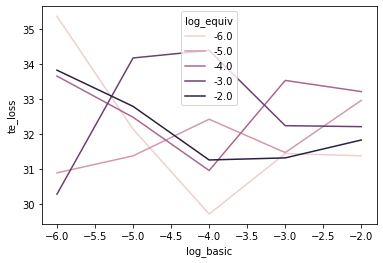

In [4]:
sns.lineplot(x='log_basic', y='te_loss', hue='log_equiv', data=results)

<AxesSubplot:xlabel='log_equiv', ylabel='te_loss'>

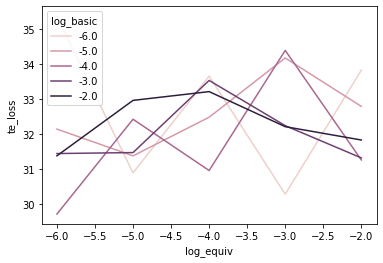

In [5]:
sns.lineplot(x='log_equiv', y='te_loss', hue='log_basic', data=results)

<ipython-input-6-3d626473f4fc>:5: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(imshow_)


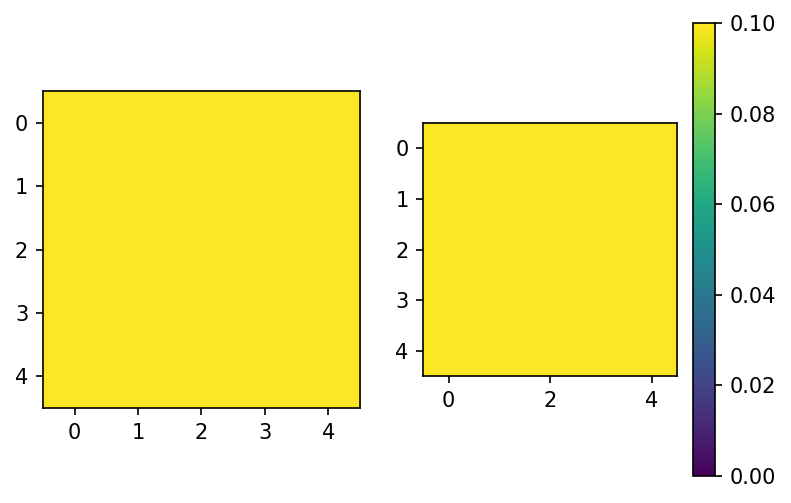

In [6]:
fig, ax = plt.subplots(1, 2, dpi=150)
imshow_ = ax[0].imshow(tr_mat, vmin=0., vmax=0.1)

ax[1].imshow(te_mat, vmin=0., vmax=0.1)
fig.colorbar(imshow_)